In [ ]:
!pip uninstall tensorflow
!pip uninstall keras

In [ ]:
!pip install tensorflow-gpu
!pip install keras

# Exercise: Neural Network Basics in Keras​

## The Exercise
​
You will build a few neural networks during this exercise, for all the networks you build you should:
​
* Build a network for classification using the built in MNIST dataset.
* Use the sigmoid activation function.
* Use the categorical cross entropy loss function.
* Use stochastic gradient descent as the optimizer.
* Train for at least 10 epochs.
* Plot a chart with your network's performance on training and validation data during training.


### Importing Required Libraries

In [ ]:
from matplotlib import pyplot as plt 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

### The MNIST Dataset

Importing Data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Visualizing our Training Data

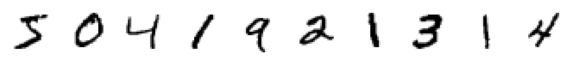

In [ ]:
_, ax = plt.subplots(1,10,figsize=(10,10)) #displaying data (training)

for i in range(0,10):
  ax[i].axis('off')
  ax[i].imshow(train_images[i],cmap=plt.cm.binary)

Visualizing our Testing Data

label= 7


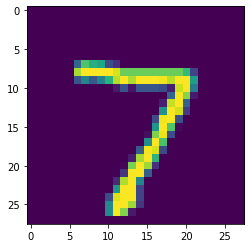

In [ ]:
plt.imshow(test_images[0]) #another way of displaying data (testing)
print("label=", test_labels[0])

Reshaping Data & One Hot Encoding

In [ ]:
print(train_images.shape, test_images.shape) #dimensions of data set

(60000, 28, 28) (10000, 28, 28)


In [ ]:
train_data = train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2])
print(train_data.shape) #reshaping
test_data = test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
print(test_data.shape)  #reshaping

(60000, 784)
(10000, 784)


In [ ]:
mnist_num_classes = 10 #10 labels of data 
mnist_image_size = train_images.shape[1]*train_images.shape[2] #size = 28*28 = 784

In [ ]:
train_labels = to_categorical(train_labels,mnist_num_classes) #turning labels into arrays
test_labels = to_categorical(test_labels,mnist_num_classes)

In [ ]:
print(train_labels[0])  #number is 5
print(test_labels[0])   #number is 7

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Defining a Plot Function

In [ ]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

### Part One
​
Use Keras to build a network with a single hidden layer and at least 300,000 trainable parameters. Answer the following questions about this model:



#### Question 1

* How many total trainable parameters does this model have?
  * How many weights?
  * How many biases?

Here we use a model with a single layer of 400 neurons.

Activation Function = Sigmoid

Opitmizer Function = Stochastic Gradient Descent

Loss Function = Categorical Cross Entropy

In [ ]:
model_1 = Sequential()
model_1.add(Dense(units=400, activation='sigmoid', input_shape=(mnist_image_size,)))
model_1.add(Dense(units=mnist_num_classes, activation='softmax'))
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights,biases = model_1.layers[0].get_weights()  #number of weights and biases
print(weights.shape, biases.shape)

(784, 400) (400,)


Thus we observe that total trainable parameters here are 318,010

The breakdown is as follows:

For the first hidden layaer: 784 inputs * 400 units + 400 units of layer = 314,000

For the last layer: 400 inputs * 10 units + 10 units of layer = 4,010

Thus, 314,000 + 4,010 = 318,010

#### Question 2

* How accurate was this model on the validation data after 10 epochs?
  * How different was the model's performance on the training data?
  * How different was the model's performance on the test data?

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1417 - accuracy: 0.9595 - val_loss: 0.1543 - val_accuracy: 0.9559
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1347 - accuracy: 0.9625 - val_loss: 0.1485 - val_accuracy: 0.9592
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1317 - accuracy: 0.9639 - val_loss: 0.1462 - val_accuracy: 0.9573
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1269 - accuracy: 0.9648 - val_loss: 0.1444 - val_accuracy: 0.9589
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1215 - accuracy: 0.9668 - val_loss: 0.1455 - val_accuracy: 0.9572
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1203 - accuracy: 0.9663 - val_loss: 0.1381 - val_accuracy: 0.9617
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1154 - accuracy: 0.9685 - val_loss: 0.1373 - val_accuracy:

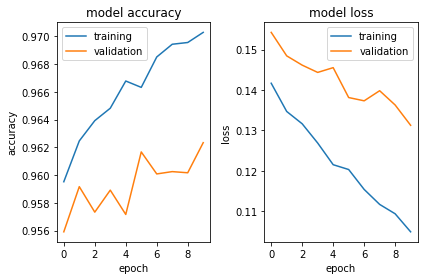

313/313 [==============================] - 1s 2ms/step - loss: 0.1287 - accuracy: 0.9599
Test loss: 0.129
Test accuracy: 0.96


In [ ]:
epochs = 10
batch_size = 32
validation_split = 0.2

history = model_1.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=True, validation_split=validation_split)
plot_training_history(history, model_1)

As we see, the model thus reached an accuracy of 95%+ with a training accuracy of 95.99% and test accuracy of 96%

#### Question 3
* About how long did each epoch take?

From the above result, we observe that each epoch took about 3s

#### Question 4

* Use Keras to build a network with a single hidden layer at fewer than 50,000 trainable parameters, then answer the same questions.

In [ ]:
# Here, we are using the model that performed pretty well in the previous exercise
model_1 = Sequential()
model_1.add(Dense(units=50, activation='sigmoid', input_shape=(mnist_image_size,)))
model_1.add(Dense(units=mnist_num_classes, activation='softmax'))
model_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights,biases = model_1.layers[0].get_weights()  #size of weights and biases
print(weights.shape, biases.shape)

(784, 64) (64,)


Thus we observe that total trainable parameters here are 39,760

The breakdown is as follows:

For the first hidden layaer: 784 inputs * 50 units + 50 units of layer = 39,250

For the last layer: 50 inputs * 10 units + 10 units of layer = 510

Thus, 39,250 + 510 = 39,760

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9188 - accuracy: 0.7677 - val_loss: 0.5485 - val_accuracy: 0.8722
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4997 - accuracy: 0.8727 - val_loss: 0.4312 - val_accuracy: 0.8945
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4346 - accuracy: 0.8858 - val_loss: 0.3928 - val_accuracy: 0.8999
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3922 - accuracy: 0.8928 - val_loss: 0.3432 - val_accuracy: 0.9077
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3655 - accuracy: 0.8964 - val_loss: 0.3271 - val_accuracy: 0.9082
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3523 - accuracy: 0.9016 - val_loss: 0.3361 - val_accuracy: 0.9074
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3475 - accuracy: 0.9031 - val_loss: 0.3207 - val_accuracy:

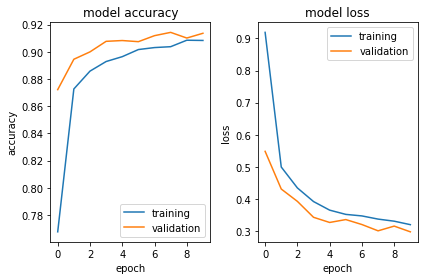

313/313 [==============================] - 1s 2ms/step - loss: 0.3039 - accuracy: 0.9117
Test loss: 0.304
Test accuracy: 0.912


In [ ]:
epochs = 10
batch_size = 32
validation_split = 0.2

history = model_1.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=True, validation_split=validation_split)
plot_training_history(history, model_1)

As we see, the model thus reached an accuracy of 91%+ with a training accuracy of 91.17% and test accuracy of 91.2%

We also observe that each epoch took about 3s


##Part Two
​
Use Keras to build 3 networks, each with at least 10 hidden layers such that:
​
* The first model has fewer than 10 nodes per layer.
* The second model has between 10-50 nodes per layer.
* The third model has between 50-100 nodes per layer.


#### Model with 9 nodes per layer

In [ ]:
model_2_1 = Sequential()
model_2_1.add(Dense(units=9, activation='sigmoid', input_shape=(mnist_image_size,)))
for _ in range(15):
  model_2_1.add(Dense(units=9, activation='sigmoid'))
model_2_1.add(Dense(units=mnist_num_classes, activation='softmax'))
model_2_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_2_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 7065      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_6 (Dense)              (None, 9)                 9

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3091 - accuracy: 0.1063 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3014 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3017 - val_accuracy: 0.1050
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3014 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3014 - accuracy: 0.1132 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3014 - accuracy: 0.1132 - val_loss: 2.3017 - val_accuracy:

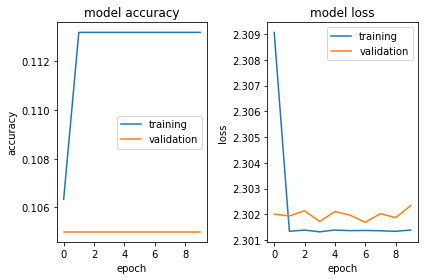

313/313 [==============================] - 1s 2ms/step - loss: 2.3011 - accuracy: 0.1135
Test loss: 2.3
Test accuracy: 0.113


In [ ]:
epochs = 10
batch_size = 32
validation_split = 0.1

history = model_2_1.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=True, validation_split=validation_split)
plot_training_history(history, model_2_1)

#### Model with 41 nodes per layer

In [ ]:
model_2_2 = Sequential()
model_2_2.add(Dense(units=41, activation='sigmoid', input_shape=(mnist_image_size,)))
for _ in range(15):
  model_2_2.add(Dense(units=41, activation='sigmoid'))
model_2_2.add(Dense(units=mnist_num_classes, activation='softmax'))
model_2_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_2_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 41)                32185     
_________________________________________________________________
dense_18 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_19 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_20 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_21 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_22 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_23 (Dense)             (None, 41)               

Epoch 1/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3042 - accuracy: 0.1113 - val_loss: 2.3037 - val_accuracy: 0.1050
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3021 - accuracy: 0.1119 - val_loss: 2.3020 - val_accuracy: 0.1113
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3019 - accuracy: 0.1118 - val_loss: 2.3023 - val_accuracy: 0.1050
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3018 - accuracy: 0.1115 - val_loss: 2.3038 - val_accuracy: 0.1050
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3021 - accuracy: 0.1125 - val_loss: 2.3024 - val_accuracy: 0.1050
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3019 - accuracy: 0.1120 - val_loss: 2.3029 - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3020 - accuracy: 0.1125 - val_loss: 2.3026 - val_accuracy:

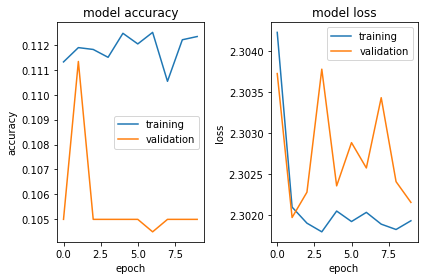

313/313 [==============================] - 1s 2ms/step - loss: 2.3012 - accuracy: 0.1135
Test loss: 2.3
Test accuracy: 0.113


In [ ]:
epochs = 10
batch_size = 32
validation_split = 0.1

history = model_2_2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=True, validation_split=validation_split)
plot_training_history(history, model_2_2)

#### Model with 97 nodes per layer

In [ ]:
# Here, we are using the model that performed pretty well in the previous exercise
model_2_3 = Sequential()
model_2_3.add(Dense(units=97, activation='sigmoid', input_shape=(mnist_image_size,)))
for _ in range(15):
  model_2_3.add(Dense(units=97, activation='sigmoid'))
model_2_3.add(Dense(units=mnist_num_classes, activation='softmax'))
model_2_3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_2_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 97)                76145     
_________________________________________________________________
dense_35 (Dense)             (None, 97)                9506      
_________________________________________________________________
dense_36 (Dense)             (None, 97)                9506      
_________________________________________________________________
dense_37 (Dense)             (None, 97)                9506      
_________________________________________________________________
dense_38 (Dense)             (None, 97)                9506      
_________________________________________________________________
dense_39 (Dense)             (None, 97)                9506      
_________________________________________________________________
dense_40 (Dense)             (None, 97)               

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3051 - accuracy: 0.1077 - val_loss: 2.3041 - val_accuracy: 0.1050
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3032 - accuracy: 0.1085 - val_loss: 2.3014 - val_accuracy: 0.1113
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3032 - accuracy: 0.1087 - val_loss: 2.3058 - val_accuracy: 0.1050
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3031 - accuracy: 0.1072 - val_loss: 2.3039 - val_accuracy: 0.1050
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3031 - accuracy: 0.1086 - val_loss: 2.3035 - val_accuracy: 0.1050
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3032 - accuracy: 0.1082 - val_loss: 2.3048 - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3030 - accuracy: 0.1102 - val_loss: 2.3052 - val_accuracy:

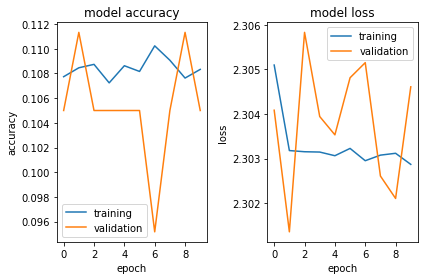

313/313 [==============================] - 1s 2ms/step - loss: 2.3033 - accuracy: 0.1135
Test loss: 2.3
Test accuracy: 0.113


In [ ]:
epochs = 10
batch_size = 32
validation_split = 0.1

history = model_2_3.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=True, validation_split=validation_split)
plot_training_history(history, model_2_3)

#### Observations


* The first model has fewer than 10 nodes per layer.

  * Trainable parameters = 8,515
  * Time per epoch = 6s
  * Training Accuracy = 11.35%
  * Teasting Accuracy = 11.3%

* The second model has between 10-50 nodes per layer.

  * Trainable parameters = 58,435
  * Time per epoch = 6s
  * Training Accuracy = 11.35%
  * Teasting Accuracy = 11.3%

* The third model has between 50-100 nodes per layer.

  * Trainable parameters = 219,715
  * Time per epoch = 6s
  * Training Accuracy = 11.35%
  * Teasting Accuracy = 11.3%

#### Question 1

* Did any of these models achieve better than 20% accuracy on validation or test data?
  * State a hypothesis about why these networks performed the way they did.
  * An answer to this question is given in a notebook from the next section [01-activations](/02-training-and-regularization-tactics/01-activations.ipynb)

No.

All the models achieved an accuracy of roughly 11%+ The answer to why these netwroks performed the way they did lies in it's activation function (sigmoid) and it's effect on the used optimizer (stochastic gradient decent).

This function is a common choice, and is the O.G. activation function. It has some important and nice properties:

* is differentiable, which is very important because of how gradient descent and backpropogation work.
* Is bounded between 0 and 1.

It also has some problems, in particlar one of the reasons sigmoid is falling out of favor is called the vanishing gradient problem. Consider this plot with sigmoid and it's derivative:

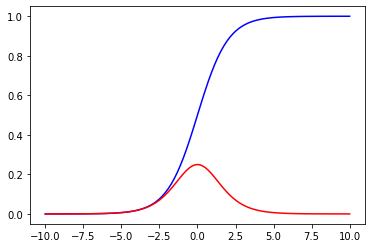

In [ ]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

r = np.linspace(-10, 10, 100)
plt.plot(r, sigmoid(r), 'b')
plt.plot(r, sigmoid_prime(r), 'r')
plt.show()

The maximum point of the function is 1/4, and the function horizontally asymptotes at 0. In other words, the output of the derivative of the cost function is always between 0 and 1/4. 

Each neuron or “activity” is derived from the previous: it is the previous activity multiplied by some weight and then fed through an activation function. The input, of course, is the notable exception. 

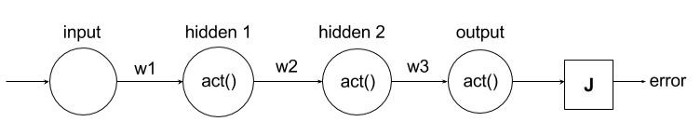

The error at the end returns the aggregate error (J) of our system. We then perform backpropagation to modify the weights through sochastic gradient descent.

To calculate the derivative to the first weight, we used the chain rule to “backpropagate” as follows:

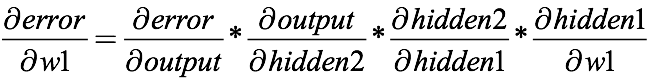

With regards to the first derivative — since the output is the activation of the 2nd hidden unit, and we are using the sigmoid function as our activation function, then the derivative of the output is going to contain the derivative of the sigmoid function. By multiplying these two derivatives together, we are multiplying two values in the range (0, 1/4]. Any two numbers between 0 and 1 multiplied with each other will simply result in a smaller value. 

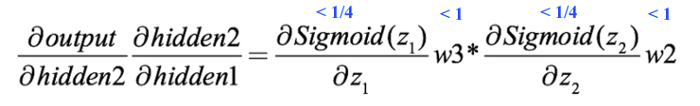

Thus the values in a multi layer neural network will become small very fast. This is the vanishing gradient problem. Many of these sigmoid derivatives multiplied together would be small enough to compensate for the other weights, and the other weights may want to shift into a range below 1.
This neural network isn’t that deep. But in a deeper one used in an industrial application, as we backpropagate further back, we’d have many more small numbers partaking in a product, creating an even tinier gradient! Thus, with deep neural nets, the vanishing gradient problem becomes a major concern.

As a result, the model requires huge amounts of time to train and is super inefficient. This is the reason for our low accuracy!

References:

* [Medium Article on Vanishing Gradients](https://ayearofai.com/rohan-4-the-vanishing-gradient-problem-ec68f76ffb9b)

* [01-activations](/02-training-and-regularization-tactics/01-activations.ipynb)


#### Question 2

* How many total trainable parameters do each of these models have?
* Is there a clear correlation between number of trainable parameters and accuracy?

Consider your results from part one in answering this question.

As mentioned in the observations, each of these neural networks have trainable parameters around 8k, 60k and 200k respectively.

The answer to the second question is - No. The accuracy for each of these models however remains the same. As explained in the previous answer, the choice of sigmoid function for a multi layer neural network is not the optimal choice with the optimizer being simply the sochastic gradient descent. The gradient function due to the choice of activation funtion barely undergoes any change thus signifying no significant change in accuracy for the given values.

Incase of the model used in part one (single layer with 400 units), the error gerated due to the iterative back propogation was reduced. Further more, the number of trainable parametres used were much more that the one's used in the multi layer neural network. Thus these two factors together compensated for the choice of activation function.

We also observe here that the epoch time also increased from 3 secs per epoch to 6 secs per epoch. Thus signifying reduction in temporal accuracy as well.

##Part Three

​Build a network with at least 3 hidden layers that achieves better than 92% accuracy on validation and test data. You may need to train for more than 10 epochs to achieve this result.​

#### Building the Model

Here we use a model with three layers of 512, 256 and 128 neurons respectively.

Activation Function = Sigmoid

Opitmizer Function = Stochastic Gradient Descent

Loss Function = Categorical Cross Entropy

Number of Epochs = 30

In [ ]:
model_3 = Sequential()
model_3.add(Dense(units=512, activation='sigmoid', input_shape=(mnist_image_size,)))
model_3.add(Dense(units=256, activation='sigmoid'))
model_3.add(Dense(units=128, activation='sigmoid'))
model_3.add(Dense(units=mnist_num_classes, activation='softmax'))
model_3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
1688/1688 [==============================] - 4s 3ms/step - loss: 1.9024 - accuracy: 0.5243 - val_loss: 1.2838 - val_accuracy: 0.7623
Epoch 2/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.9123 - accuracy: 0.8115 - val_loss: 0.5935 - val_accuracy: 0.8892
Epoch 3/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.5274 - accuracy: 0.8778 - val_loss: 0.3846 - val_accuracy: 0.9157
Epoch 4/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3886 - accuracy: 0.9021 - val_loss: 0.3005 - val_accuracy: 0.9270
Epoch 5/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3220 - accuracy: 0.9159 - val_loss: 0.2552 - val_accuracy: 0.9363
Epoch 6/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2783 - accuracy: 0.9253 - val_loss: 0.2251 - val_accuracy: 0.9445
Epoch 7/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2491 - accuracy: 0.9333 - val_loss: 0.2041 - val_accuracy:

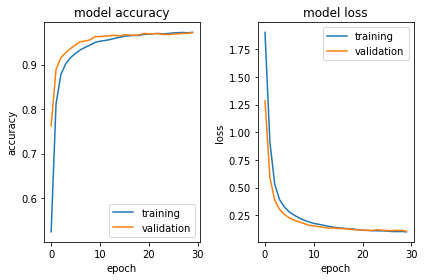

313/313 [==============================] - 1s 2ms/step - loss: 0.1201 - accuracy: 0.9645
Test loss: 0.12
Test accuracy: 0.965


In [ ]:
epochs = 30
batch_size = 32
validation_split = 0.1

history = model_3.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=True, validation_split=validation_split)
plot_training_history(history, model_3)

#### Observations

  * Trainable parameters = 567,434
  * Time per epoch = 4s
  * Training Accuracy = 96.45%
  * Teasting Accuracy = 96.5%

#### Question 1

* Compare your best results to the result you got in part one:
  * Which network achieved the best accuracy on test data after training?
  * Did the networks train for a similar number of epochs?

From the above observations, we see that our model yields a somewhat better result if not approxiamtelty the same one as our model in part one. Here we have increased the number of neurons per layer, thus increasing the number of trainable parameters to compensate for the low accuracy of sigmoid function and also arranged the number of neurons in a decreasing order per layer thereby reducing the effect of back propagation.

We see from the individual epoch results (by setting verbose = True), that our current model roughly achieves the accuracy of that of part one after 10 epochs but keeps getting better as we let it run for more thereby clearly showing the characteristics of slow decreasing rate of the sigmoid functioned coupled with the simple stochastic gradient descent fucntion.